# U.S. Trade Balance Analysis
**By Sam Kovi**  
*May 27, 2025*  

**Environment:**  
- Anaconda Navigator 2.3.0  (Using older version installed couple of years back as part of ML course)
- Jupyter Notebook 6.4.12  
- Python 3.10.4  
- Pandas 1.4.4  
- NumPy 1.23.1  
- Seaborn 0.13.2  
- Matplotlib 3.10.1
    
## Summary
This Jupyter notebook analyzes U.S. trade balance trends using data sourced from the U.S. Census Bureau, contained in 'country.xlsx'. The analysis includes:

- **Deficit Trends**: Examining trade deficit patterns starting from 1985.
- **Top Trading Partners**: Identifying key countries by import volumes.
- **Impact of 2018 Tariffs**: How the 2018 Tariffs on China impacted imports and Shifting Supply Chains particularly Vietnam and Mexico as beneficieries.
- **COVID-19 and Supply Chain Resilience**: The pandemic exposed vulnerabilities in China-centric supply chains, prompting companies to diversify to avoid disruptions. This trend continued into 2024, with firms prioritizing resilience over cost.

In [1]:
# !pip install pandas numpy matplotlib tabulate seaborn
#!pip install prettytable 

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.patches as mpatches
%matplotlib inline

In [4]:
#define Parameters
parameters = {
    'metric': 'IYR',  # Metric for imports (year-to-date imports)
    'n_countries': 10,  # Number of top countries to display
    'share_threshold': 2.0,  # Legend threshold for % share
    'bar_height': 0.4,  # Bar thickness (0 to 1)
    'figsize': (10, 4),  # Plot size, override wherever needed
    'colormap': 'tab10',  # Matplotlib colormap
    'file_url': 'https://www.census.gov/foreign-trade/balance/country.xlsx' # Census Bureau Trade data file location
}

In [6]:
# Read the file directly from the Census Bureau to get latest available data
df = pd.read_excel(parameters['file_url'])    
month_columns = [col for col in df.columns if col not in ['year', 'CTY_CODE','CTYNAME']] 
# Convert values in monthly columns from millions to billions
for col in month_columns:
    df[col] = df[col].apply(lambda val: (val / 1000))   # Convert Millions to Billions

In [7]:
# Add new column for Trade_Balance = Exports (EYR) - Imports (IYR)
df['Trade_Balance'] = (df['EYR'] - df['IYR']) 
df_countries = df[df['CTY_CODE']>1000]  #exclude regions with CTY_CODE <1000 Ex: Europe, Asia etc...
df_countries[df_countries['year']==2025].sort_values(by='IJAN',ascending=False).head()  # display top 5 rows from 2025 

,year,CTY_CODE,CTYNAME,IJAN,IFEB,IMAR,IAPR,IMAY,IJUN,IJUL,...,EMAY,EJUN,EJUL,EAUG,ESEP,EOCT,ENOV,EDEC,EYR,Trade_Balance
675,2025,2010,Mexico,41.678591,41.638740,47.981832,41.868767,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.891093,-61.276837
5782,2025,5700,China,41.639171,31.635372,29.383678,25.378078,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.014180,-88.022118
600,2025,1220,Canada,38.338464,34.924705,35.667618,29.437590,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.970655,-23.397721
3177,2025,4419,Switzerland,23.811100,19.948209,18.565358,6.171951,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.366805,-52.129813
2948,2025,4280,Germany,13.659215,12.679430,15.654355,13.169150,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.532147,-27.630004


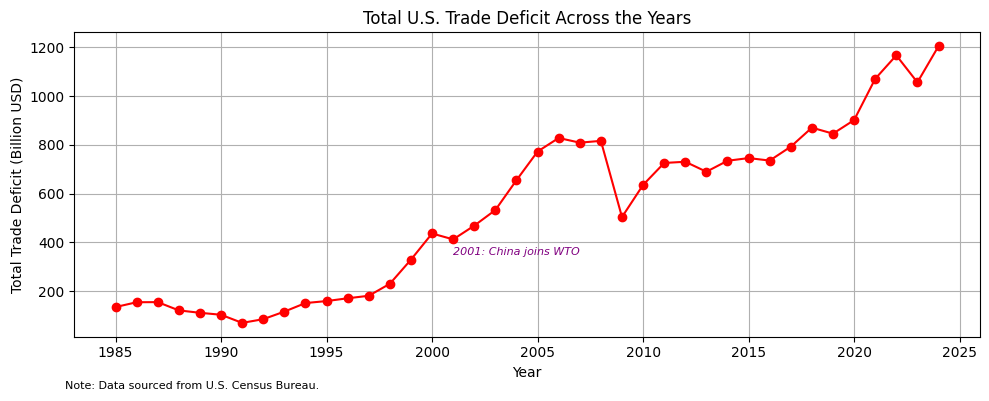

In [8]:
#Line Plot total trade balance by year
#Exclude 2025 partial data 
total_trade_balance = df_countries[df_countries['year']<2025].groupby('year')['Trade_Balance'].sum()
fig = plt.figure(figsize=parameters['figsize'])
plt.plot(total_trade_balance.index, total_trade_balance * -1, marker='o', color='red')
plt.title('Total U.S. Trade Deficit Across the Years')
plt.xlabel('Year')
plt.ylabel('Total Trade Deficit (Billion USD)')
# Add footnote
fig.text(.07, 0.01, 'Note: Data sourced from U.S. Census Bureau.', 
         fontsize=8, ha='left', va='bottom', transform=fig.transFigure)
plt.grid(True)
plt.text(
    x=2001,  # Center of the third bar (0-based index)
    y=340,  # Y-value in data units
    s='2001: China joins WTO',  # Text of the note
    fontsize=8,
    color='purple',
    fontstyle='italic',
    ha='left',  # Horizontal alignment
    va='bottom'  # Vertical alignment)  
)
plt.tight_layout()
plt.show()

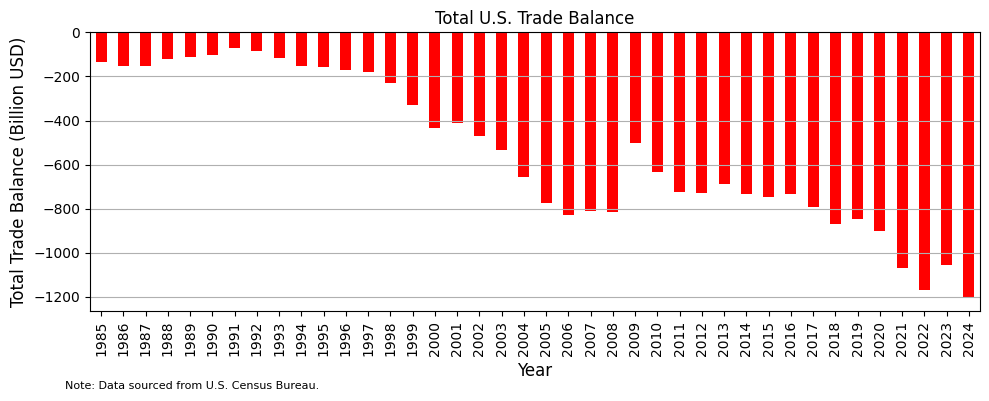

year
1985    -134.263700
1986    -153.987700
1987    -154.476200
1988    -120.526600
1989    -110.648900
1990    -102.581200
1991     -69.256400
1992     -84.497200
1993    -115.566300
1994    -150.626700
1995    -158.804600
1996    -170.213300
1997    -180.523000
1998    -229.758200
1999    -328.818800
2000    -436.104600
2001    -411.897500
2002    -468.265000
2003    -532.350268
2004    -654.829744
2005    -772.372708
2006    -827.970978
2007    -808.763121
2008    -816.198714
2009    -503.581850
2010    -635.362068
2011    -725.446591
2012    -730.446307
2013    -689.469854
2014    -734.482279
2015    -745.483002
2016    -735.326217
2017    -792.395927
2018    -870.358387
2019    -845.759229
2020    -901.481777
2021   -1070.771774
2022   -1167.084887
2023   -1056.317211
2024   -1204.719438
Name: Trade_Balance, dtype: float64


In [9]:
#Bar Plot total trade balance by year
fig = plt.figure(figsize=parameters['figsize'])
total_trade_balance.plot(kind='bar', color=['green' if x >= 0 else 'red' for x in total_trade_balance])
plt.title('Total U.S. Trade Balance')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Total Trade Balance (Billion USD)',fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
# Add footnote
fig.text(.07, 0.01, 'Note: Data sourced from U.S. Census Bureau.', 
         fontsize=8, ha='left', va='bottom', transform=fig.transFigure)
plt.show()
print(total_trade_balance)

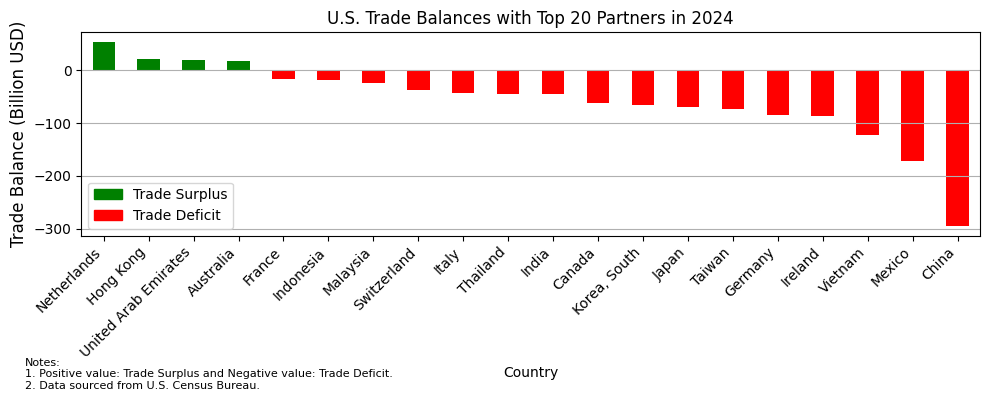

In [10]:
#Look at 2024 Trade Balance data and list top 20 countries in absolute terms of trade balance
top_rows = 20
dfc_2024=df_countries[df_countries['year']==2024] #2024 Data
trade_balance_summary = dfc_2024.groupby('CTYNAME')['Trade_Balance'].mean().sort_values()

# Get top by absolute mean trade balance
top_n = trade_balance_summary.abs().sort_values(ascending=False).head(top_rows).index
top_n_data = trade_balance_summary.loc[top_n].sort_values(ascending=False)

#Plot top trade balance values
fig= plt.figure(figsize=parameters['figsize'])
top_n_data.plot(kind='bar', color=['green' if x >= 0 else 'red' for x in top_n_data])
plt.title('U.S. Trade Balances with Top {} Partners in {}'.format(top_rows, dfc_2024['year'].iloc[0]))
plt.xlabel('Country',fontsize=10)
plt.ylabel('Trade Balance (Billion USD)',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

red_patch = mpatches.Patch(color='red', label='Trade Deficit')
green_patch = mpatches.Patch(color='green', label='Trade Surplus')
plt.legend(handles=[green_patch,red_patch],loc='lower left')
# Add footnote
fig.text(.03, 0.01, '\n\nNotes:\n1. Positive value: Trade Surplus and Negative value: Trade Deficit.\n2. Data sourced from U.S. Census Bureau.', 
         fontsize=8, ha='left', va='bottom', transform=fig.transFigure)
plt.show()

In [11]:
#Display top data
print("\nU.S. Trade Balances with Top {} Partners in {}:".format(top_rows,dfc_2024['year'].iloc[0]))
# Set display options for better formatting
pd.set_option('display.max_columns', 10)  # Limit columns for brevity
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimal places
print(top_n_data.sort_values().to_string(index=True))


U.S. Trade Balances with Top 20 Partners in 2024:
CTYNAME
China                  -295.52
Mexico                 -171.49
Vietnam                -123.46
Ireland                 -86.52
Germany                 -84.66
Taiwan                  -73.72
Japan                   -69.39
Korea, South            -65.97
Canada                  -61.98
India                   -45.80
Thailand                -45.49
Italy                   -43.99
Switzerland             -38.28
Malaysia                -24.85
Indonesia               -17.89
France                  -16.24
Australia                17.91
United Arab Emirates     19.62
Hong Kong                21.94
Netherlands              54.17


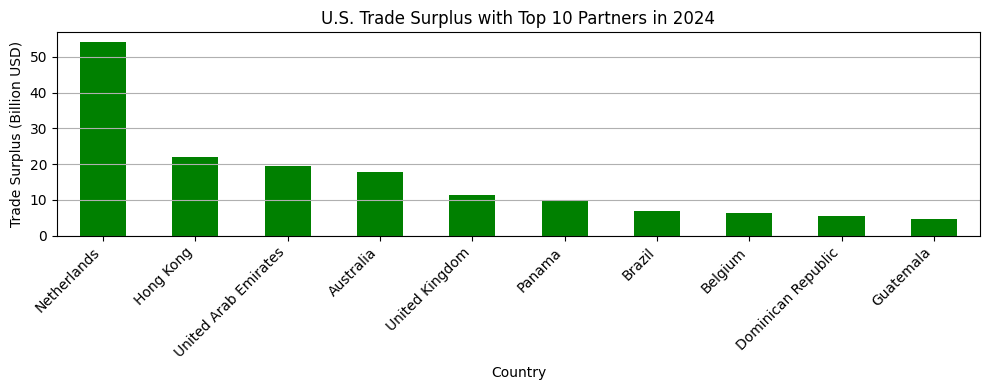

In [12]:
#Top 10 Countries with Trade Surplus
top_rows = 10
top_10_export_idx = trade_balance_summary.sort_values(ascending=False).head(top_rows).index
top_10_export_data = trade_balance_summary.loc[top_10_export_idx].sort_values(ascending=False)
#Plot top 10 trade balance values
plt.figure(figsize=parameters['figsize'])
top_10_export_data.plot(kind='bar', color=['green' if x >= 0 else 'red' for x in top_10_export_data])
plt.title('U.S. Trade Surplus with Top {} Partners in {}'.format(top_rows,dfc_2024['year'].iloc[0]))
plt.xlabel('Country')
plt.ylabel('Trade Surplus (Billion USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

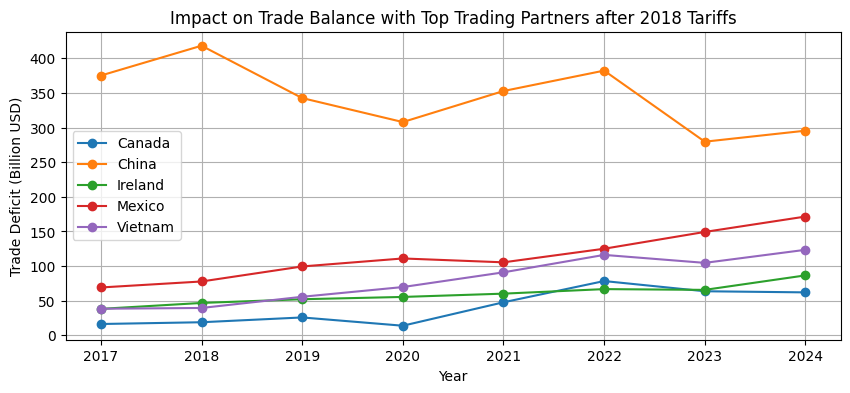

In [13]:
# Visualize trade balance for selected countries (2017-2024)
selected_regions = ['China','Mexico','Ireland','Vietnam','Canada']
filtered_df = df_countries[(df_countries['CTYNAME'].isin(selected_regions)) & ((df_countries['year']<2025) & (df_countries['year']>=2017))]
# Pivot data for plotting
pivot_df = filtered_df.pivot(index='year', columns='CTYNAME', values='Trade_Balance')
# Create line plot 
plt.figure(figsize=parameters['figsize'])
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column] * -1, marker='o', label=column)  
    # Convert deficit to positive value for better visualization of the trend
plt.title('Impact on Trade Balance with Top Trading Partners after 2018 Tariffs')
plt.xlabel('Year')
plt.ylabel('Trade Deficit (Billion USD)')
plt.legend()
plt.grid(True)
plt.show()

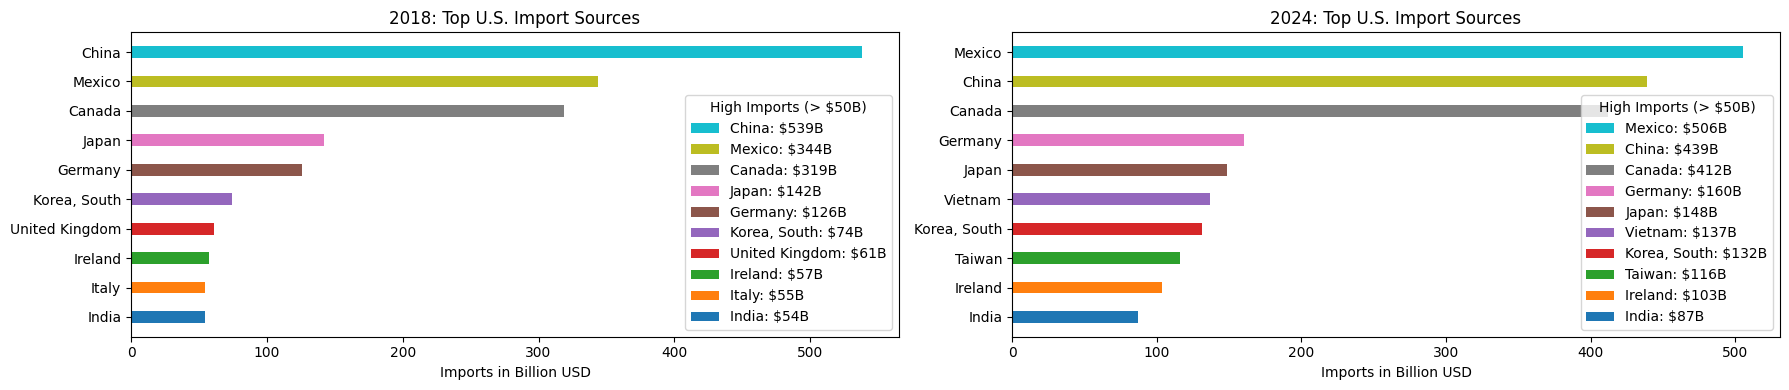

In [14]:
#Compare Total Imports between 2018 and 2024 and how they changed with 2018 tariffs on China
analysis_year1=2018
analysis_year2=2024
df_tp1 = df_countries[df_countries['year'].isin([analysis_year1])]
df_tp2 = df_countries[df_countries['year'].isin([analysis_year2])]

# Data for imports plot
df_imp_tp1 = df_tp1.nlargest(10, 'IYR').sort_values(by='IYR', ascending=True)
df_imp_tp2 = df_tp2.nlargest(10, 'IYR').sort_values(by='IYR', ascending=True)

# Colors for bars
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # tab10 colormap for 10 distinct colors

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))  # Adjusted figsize for side-by-side display

# Imports plot (left subplot)
bars1 = ax1.barh(df_imp_tp1['CTYNAME'], df_imp_tp1['IYR'], color=colors, height=0.4)
ax1.set_title(f'{analysis_year1}: Top U.S. Import Sources')
ax1.set_xlabel('Imports in Billion USD')
# Add labels for high imports
threshold_imp = 50
for i, bar in enumerate(bars1):
    iyr = df_imp_tp1['IYR'].iloc[i]
    if iyr > threshold_imp:
        bar.set_label(f'{df_imp_tp1["CTYNAME"].iloc[i]}: ${iyr:,.0f}B')
    else:
        bar.set_label('_nolegend_')
ax1.legend(title='High Imports (> ${}B)'.format(threshold_imp), reverse=True)
# 2nd plot (right subplot)
bars2 = ax2.barh(df_imp_tp2['CTYNAME'], df_imp_tp2['IYR'], color=colors, height=0.4)
ax2.set_title(f'{analysis_year2}: Top U.S. Import Sources')
ax2.set_xlabel('Imports in Billion USD')

# Add labels for high imports 2024
for i, bar in enumerate(bars2):
    iyr = df_imp_tp2['IYR'].iloc[i]
    if iyr > threshold_imp:
        bar.set_label(f'{df_imp_tp2["CTYNAME"].iloc[i]}: ${iyr:,.0f}B')
    else:
        bar.set_label('_nolegend_')
        
ax2.legend(title='High Imports (> ${}B)'.format(threshold_imp), reverse=True)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

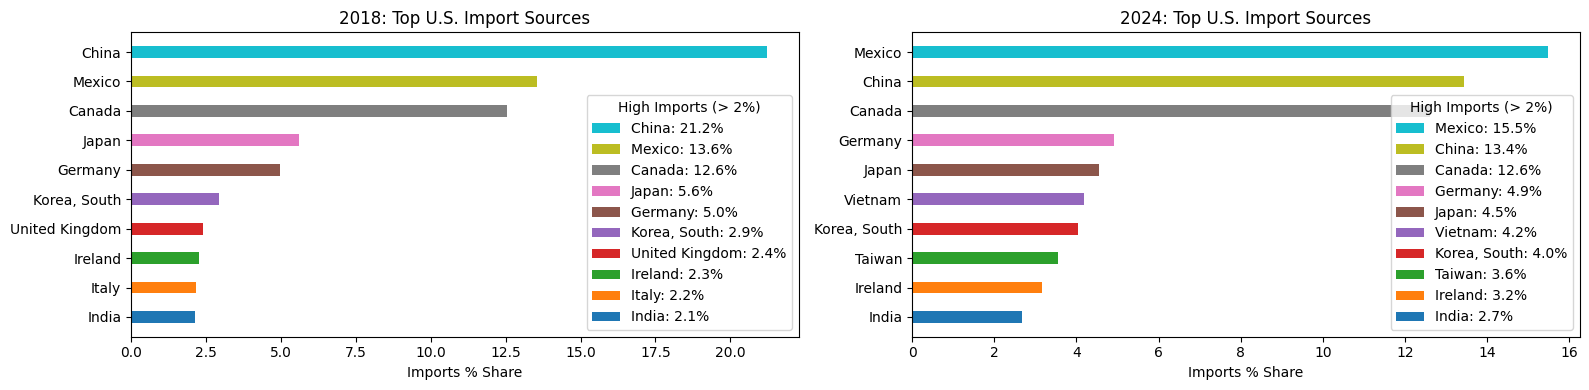

In [15]:
#Compare Total Imports Percent Share between 2018 and 2024 and how they changed with 2018 tariffs on China
analysis_year1 = 2018
analysis_year2 = 2024

# Function to process data for a given year
def process_data(df, year):
    # Filter data for the specified year
    df_study_period = df[df['year'] == year].copy()
    
    # Calculate total imports
    total_imports = df_study_period[parameters['metric']].sum()
    
    # Calculate % share of total imports for each country
    df_study_period['Import_Share'] = (df_study_period[parameters['metric']] / total_imports * 100).round(2)
    
    # Select top N countries and sort by import share
    df_top = df_study_period.nlargest(parameters['n_countries'], 'Import_Share').sort_values(by='Import_Share', ascending=True)
    
    return df_top

df_2018 = process_data(df_countries, analysis_year1) 
df_2024 = process_data(df_countries, analysis_year2) 

# Colors for bars
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # tab10 colormap for 10 distinct colors

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))  # Adjusted figsize for side-by-side display

# Imports plot (left subplot)
bars1 = ax1.barh(df_2018['CTYNAME'], df_2018['Import_Share'], color=colors, height=0.4)
ax1.set_title(f'{analysis_year1}: Top U.S. Import Sources')
ax1.set_xlabel('Imports % Share')
# Add labels for high imports
threshold_imp = 2
for i, bar in enumerate(bars1):
    iyr = df_2018['Import_Share'].iloc[i]
    if iyr > threshold_imp:
        bar.set_label(f'{df_2018["CTYNAME"].iloc[i]}: {iyr:,.1f}%')
    else:
        bar.set_label('_nolegend_')
ax1.legend(title='High Imports (> {}%)'.format(threshold_imp), reverse=True)
# 2nd plot (right subplot)
bars2 = ax2.barh(df_2024['CTYNAME'], df_2024['Import_Share'], color=colors, height=0.4)
ax2.set_title(f'{analysis_year2}: Top U.S. Import Sources')
ax2.set_xlabel('Imports % Share')

# Add labels for high imports 2024
for i, bar in enumerate(bars2):
    iyr = df_2024['Import_Share'].iloc[i]
    if iyr > threshold_imp:
        bar.set_label(f'{df_2024["CTYNAME"].iloc[i]}: {iyr:,.1f}%')
    else:
        bar.set_label('_nolegend_')
ax2.legend(title='High Imports (> {}%)'.format(threshold_imp), reverse=True)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

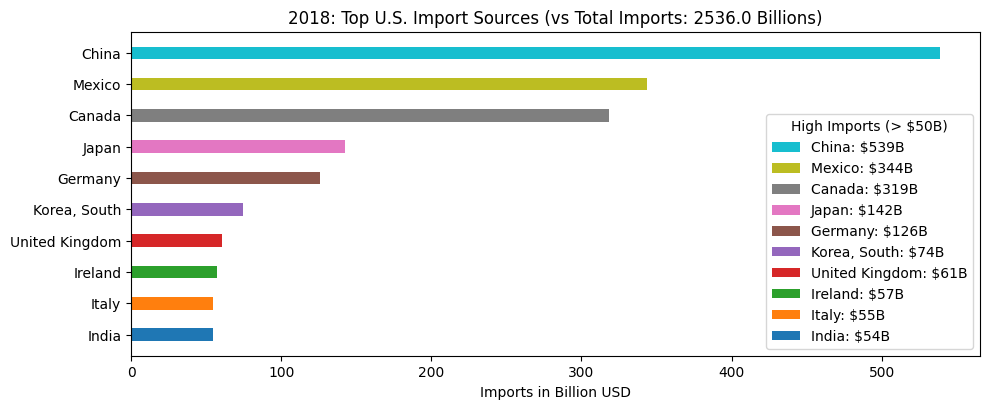

In [16]:
#Total U.S. Imports by Year
analysis_year=2018
df_tp = df_countries[df_countries['year'].isin([analysis_year])]
df_imp_tp =df_tp.nlargest(10, 'IYR').sort_values(by='IYR',ascending=True)
total_imports = (df_tp['IYR'].sum()).round(0)

colors = plt.cm.tab10(np.linspace(0, 1, 10))  # tab10 colormap for 10 distinct colors
# Create a horizontal bar plot with different colors
plt.figure(figsize=parameters['figsize'])
bars = plt.barh(df_imp_tp['CTYNAME'], df_imp_tp['IYR'], color=colors,height=0.4)
plt.title('{}: Top U.S. Import Sources (vs Total Imports: {} Billions)'.format(analysis_year,total_imports))
threshold = 50
for i, bar in enumerate(plt.gca().patches):
    iyr = df_imp_tp['IYR'].iloc[i]
    if iyr > threshold:
        bar.set_label(f'{df_imp_tp["CTYNAME"].iloc[i]}: ${iyr:,.0f}B')
    else:
        bar.set_label('_nolegend_')
plt.tight_layout()  
plt.xlabel('Imports in Billion USD')
plt.legend(title='High Imports (> ${}B)'.format(threshold),reverse=True)

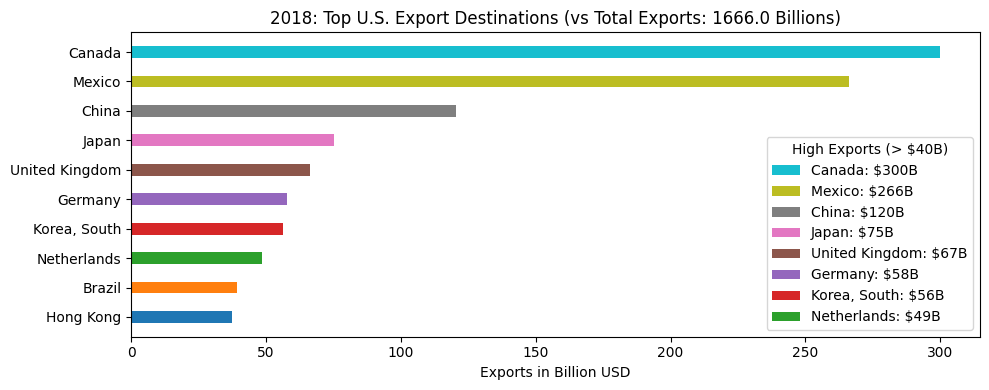

In [17]:
#2018 Total U.S. Exports
df_exp_top =df_tp.nlargest(10, 'EYR').sort_values(by='EYR',ascending=True)
# Calculate total imports
total_exports = (df_tp['EYR'].sum()).round(0)
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # tab10 colormap for 10 distinct colors
# Create a horizontal bar plot with different colors
plt.figure(figsize=parameters['figsize'])
bars = plt.barh(df_exp_top['CTYNAME'], df_exp_top['EYR'], color=colors,height=0.4)
plt.title('{}: Top U.S. Export Destinations (vs Total Exports: {} Billions)'.format(analysis_year,total_exports))
threshold = 40
for i, bar in enumerate(plt.gca().patches):
    iyr = df_exp_top['EYR'].iloc[i]
    if iyr > threshold:
        bar.set_label(f'{df_exp_top["CTYNAME"].iloc[i]}: ${iyr:,.0f}B')
    else:
        bar.set_label('_nolegend_')
plt.legend(title='High Exports (> ${}B)'.format(threshold),reverse=True)
plt.xlabel('Exports in Billion USD')
plt.tight_layout()  

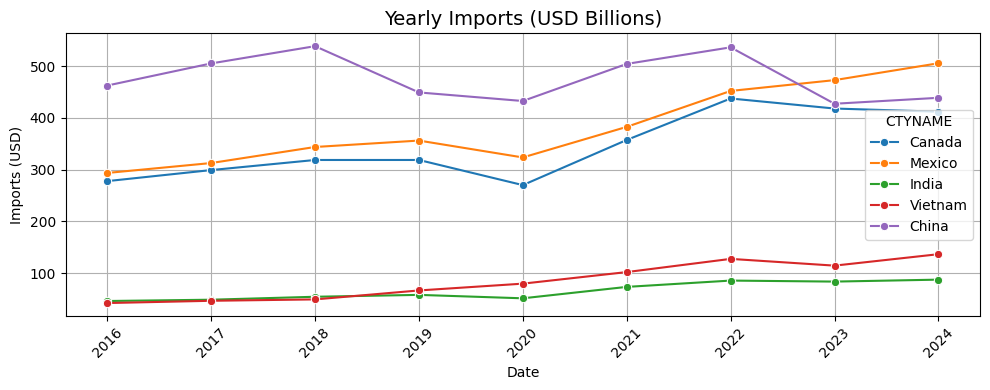

In [18]:
#Analyze Imports from 2017-2024
df_study_period = df_countries[df_countries['year'].isin([analysis_year])].copy()
df_imports = df[df['year'].isin([2016,2017,2018,2019,2020,2021,2022,2023,2024])].copy()
df_imports_subset =df_imports[df_imports['CTYNAME'].isin(['China','Mexico','Canada','Vietnam','India'])]
#Remove 2025 future months
cutoff_date = '2025-03-01'
plt.figure(figsize=parameters['figsize'])
sns.lineplot(data=df_imports_subset, x='year', y='IYR', hue='CTYNAME', marker='o',)

# Customize plot
plt.title('Yearly Imports (USD Billions)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Imports (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
#Monthly Trade Data Analysis
df_monthly = df_countries[df_countries['year'].isin([2024,2025])]

#Calculate monthly trade balance
import_cols = ['IJAN', 'IFEB', 'IMAR', 'IAPR', 'IMAY', 'IJUN', 'IJUL', 'IAUG', 'ISEP', 'IOCT', 'INOV', 'IDEC']
export_cols = ['EJAN', 'EFEB', 'EMAR', 'EAPR', 'EMAY', 'EJUN', 'EJUL', 'EAUG', 'ESEP', 'EOCT', 'ENOV', 'EDEC']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a DataFrame for monthly trade balance
df_monthly_tp = []
for year in df_monthly['year'].unique():
    for i, (imp_col, exp_col, month) in enumerate(zip(import_cols, export_cols, month_names)):
        monthly_trade = df_monthly[df_monthly['year'] == year][exp_col] - df_monthly[df_monthly['year'] == year][imp_col]
        monthly_df_temp = pd.DataFrame({
            'CTYNAME': df_monthly[df_monthly['year'] == year]['CTYNAME'],
            'Date': pd.to_datetime(year.astype(str) + '-' + month, format='%Y-%b'),
            'Exports': df_monthly[df_monthly['year'] == year][exp_col],
            'Imports': df_monthly[df_monthly['year'] == year][imp_col],
            'Trade_Balance_Monthly': monthly_trade        
        })
        df_monthly_tp.append(monthly_df_temp)

df_monthly_tp = pd.concat(df_monthly_tp, ignore_index=False)
#Remove 2025 future months
cutoff_date = '2025-04-01'
df_monthly_tp = df_monthly_tp[df_monthly_tp['Date']<=cutoff_date]

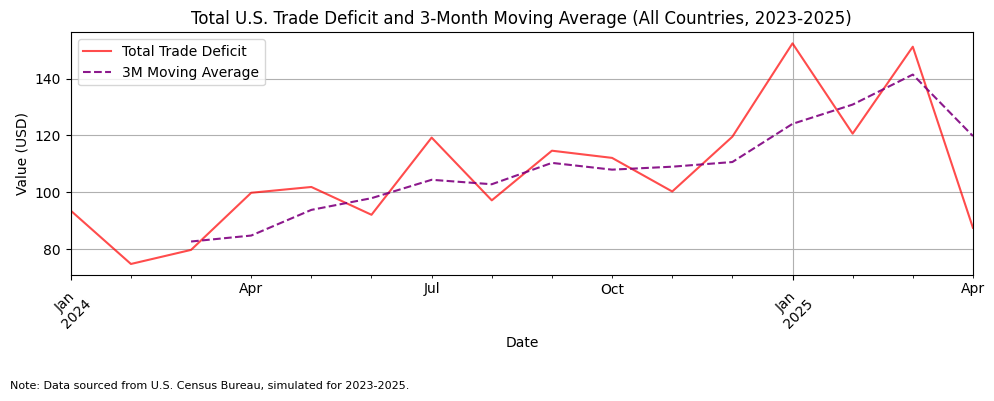

In [20]:
df_monthly_tp['Moving_Average_3M'] = df_monthly_tp['Trade_Balance_Monthly'].rolling(window=3, min_periods=3).mean()
# Sum data by month across all countries
df_summed = df_monthly_tp.groupby('Date').sum(numeric_only=True) *-1
df_summed['Moving_Average_3M_Recalc'] = df_summed['Trade_Balance_Monthly'].rolling(window=3).mean() 

# Create figure
fig = plt.figure(figsize=(parameters['figsize']))
# Plot summed Trade_Balance_Monthly and Moving_Average_3M
df_summed['Trade_Balance_Monthly'].plot(
    color='red', linestyle='-', label='Total Trade Deficit', alpha=0.7
)
df_summed['Moving_Average_3M_Recalc'].plot(
    color='purple', linestyle='--', label='3M Moving Average', alpha=0.9
)

# Customize the plot
plt.title('Total U.S. Trade Deficit and 3-Month Moving Average (All Countries, 2023-2025)')
plt.xlabel('Date')
plt.ylabel('Value (USD)')
plt.grid(True)
plt.xticks(rotation=45)

# Position legend outside (below)
plt.legend(loc='best')

# Add footnote
fig.text(0.01, 0.01, 'Note: Data sourced from U.S. Census Bureau, simulated for 2023-2025.', 
         fontsize=8, ha='left', va='bottom', transform=fig.transFigure)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Extra space for legend and footnote
plt.show()

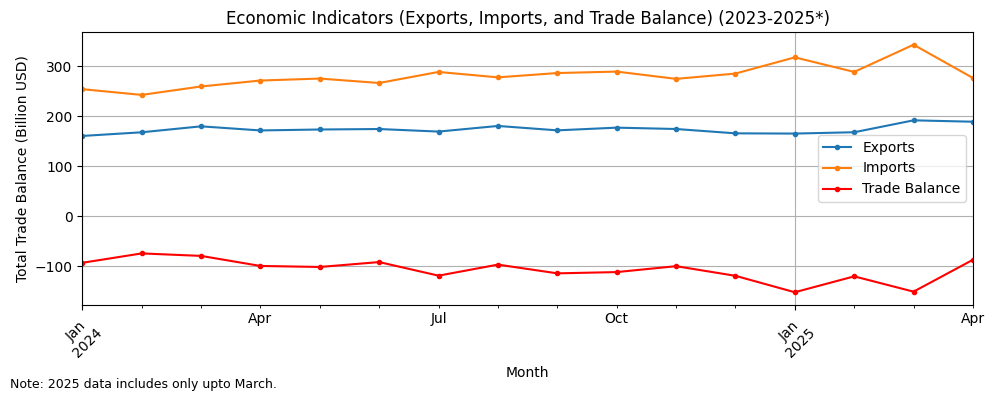

Date
2024-01-01    -93.53
2024-02-01    -74.77
2024-03-01    -79.72
2024-04-01    -99.82
2024-05-01   -101.86
2024-06-01    -92.08
2024-07-01   -119.24
2024-08-01    -97.16
2024-09-01   -114.63
2024-10-01   -112.10
2024-11-01   -100.27
2024-12-01   -119.55
2025-01-01   -152.40
2025-02-01   -120.63
2025-03-01   -151.22
2025-04-01    -87.49
Name: Trade_Balance_Monthly, dtype: float64

In [21]:
# US Monthly Economic Indicators
df_monthly = df_monthly_tp.groupby(['Date'])['Trade_Balance_Monthly'].sum()
df_monthly_imports = df_monthly_tp.groupby(['Date'])['Imports'].sum()
df_monthly_exports = df_monthly_tp.groupby(['Date'])['Exports'].sum()

fig = plt.figure(figsize=parameters['figsize'])

df_monthly_exports.plot( marker='.',label='Exports')
df_monthly_imports.plot( marker='.',label='Imports')
df_monthly.plot( marker='.',label='Trade Balance',color='red')

plt.title('Economic Indicators (Exports, Imports, and Trade Balance) (2023-2025*)')
plt.xlabel('Month')
plt.ylabel('Total Trade Balance (Billion USD)')
plt.grid(True)
plt.legend()  # Add legend to distinguish lines loc='upper left'
plt.xticks(rotation=45)
plt.tight_layout()
# Add a footnote
fig.text(0.01, 0.01, 'Note: 2025 data includes only upto March.', 
         fontsize=9, ha='left', va='bottom', transform=fig.transFigure)

plt.show()
df_monthly

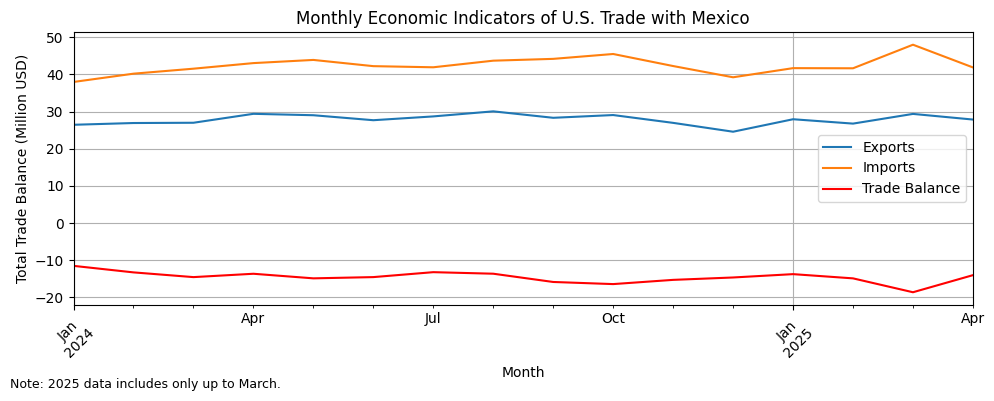

Date
2024-01-01   -11.52
2024-02-01   -13.28
2024-03-01   -14.55
2024-04-01   -13.65
2024-05-01   -14.88
2024-06-01   -14.55
2024-07-01   -13.22
2024-08-01   -13.63
2024-09-01   -15.86
2024-10-01   -16.43
2024-11-01   -15.29
2024-12-01   -14.65
2025-01-01   -13.75
2025-02-01   -14.89
2025-03-01   -18.62
2025-04-01   -14.02
Name: Trade_Balance_Monthly, dtype: float64

In [23]:
# Mexico Plot total trade balance by year
tp_country = 'Mexico'
df_monthly_mx = df_monthly_tp[df_monthly_tp['CTYNAME']==tp_country].groupby(['Date'])['Trade_Balance_Monthly'].sum()
df_monthly_mx_imports = df_monthly_tp[df_monthly_tp['CTYNAME']==tp_country].groupby(['Date'])['Imports'].sum()
df_monthly_mx_exports = df_monthly_tp[df_monthly_tp['CTYNAME']==tp_country].groupby(['Date'])['Exports'].sum()

fig = plt.figure(figsize=parameters['figsize'])

df_monthly_mx_exports.plot( marker='',label='Exports')
df_monthly_mx_imports.plot( marker='',label='Imports')
df_monthly_mx.plot( marker='',label='Trade Balance',color='red')

plt.title('Monthly Economic Indicators of U.S. Trade with {}'.format(tp_country))
plt.xlabel('Month')
plt.ylabel('Total Trade Balance (Million USD)')
plt.grid(True)
plt.legend() 
plt.xticks(rotation=45)
plt.tight_layout()
# Add a footnote
fig.text(0.01, 0.01, 'Note: 2025 data includes only up to March.', 
         fontsize=9, ha='left', va='bottom', transform=fig.transFigure)

plt.show()
df_monthly_mx

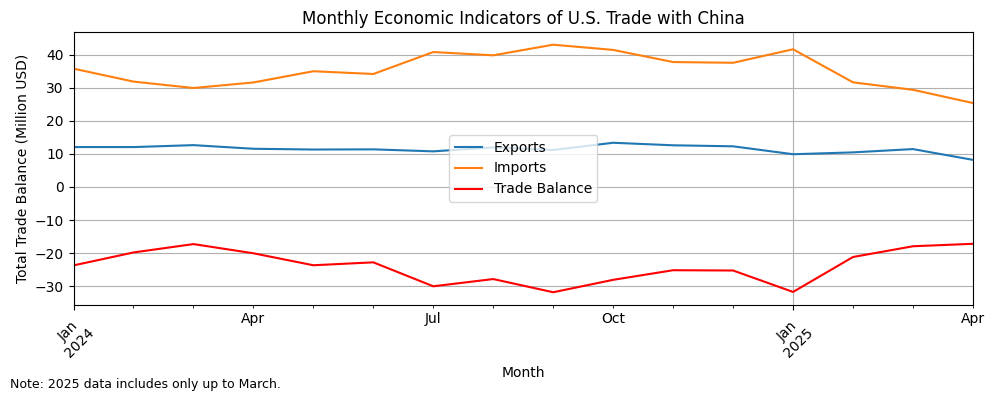

Date
2024-01-01   -23.71
2024-02-01   -19.80
2024-03-01   -17.27
2024-04-01   -20.05
2024-05-01   -23.67
2024-06-01   -22.79
2024-07-01   -30.03
2024-08-01   -27.84
2024-09-01   -31.83
2024-10-01   -28.08
2024-11-01   -25.17
2024-12-01   -25.26
2025-01-01   -31.74
2025-02-01   -21.17
2025-03-01   -17.93
2025-04-01   -17.19
Name: Trade_Balance_Monthly, dtype: float64

In [24]:
# China Plot total trade balance by year
tp_country = 'China'
df_monthly_mx = df_monthly_tp[df_monthly_tp['CTYNAME']==tp_country].groupby(['Date'])['Trade_Balance_Monthly'].sum() 
df_monthly_mx_imports = df_monthly_tp[df_monthly_tp['CTYNAME']==tp_country].groupby(['Date'])['Imports'].sum()
df_monthly_mx_exports = df_monthly_tp[df_monthly_tp['CTYNAME']==tp_country].groupby(['Date'])['Exports'].sum()

fig = plt.figure(figsize=parameters['figsize'])

df_monthly_mx_exports.plot( marker='',label='Exports')
df_monthly_mx_imports.plot( marker='',label='Imports')
df_monthly_mx.plot( marker='',label='Trade Balance',color='red')

plt.title('Monthly Economic Indicators of U.S. Trade with {}'.format(tp_country))
plt.xlabel('Month')
plt.ylabel('Total Trade Balance (Million USD)')
plt.grid(True)
plt.legend(loc='center')  # Add legend to distinguish lines loc='upper left'
plt.xticks(rotation=45)
plt.tight_layout()
# Add a footnote
fig.text(0.01, 0.01, 'Note: 2025 data includes only up to March.', 
         fontsize=9, ha='left', va='bottom', transform=fig.transFigure)

plt.show()
df_monthly_mx
#df_monthly_mx_exports

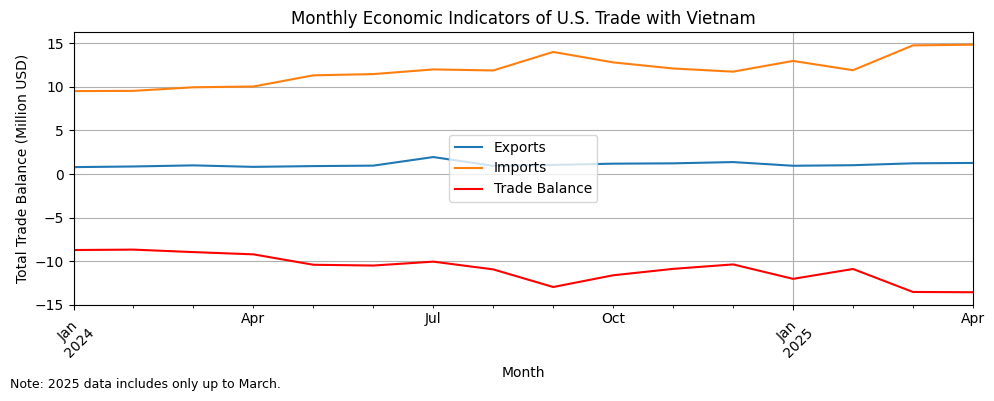

In [25]:
# Vietnam Plot total trade balance by year
tp_country = 'Vietnam'
df_monthly_mx = df_monthly_tp[df_monthly_tp['CTYNAME']==tp_country].groupby(['Date'])['Trade_Balance_Monthly'].sum() 
df_monthly_mx_imports = df_monthly_tp[df_monthly_tp['CTYNAME']==tp_country].groupby(['Date'])['Imports'].sum()
df_monthly_mx_exports = df_monthly_tp[df_monthly_tp['CTYNAME']==tp_country].groupby(['Date'])['Exports'].sum()

fig = plt.figure(figsize=parameters['figsize'])

df_monthly_mx_exports.plot( marker='',label='Exports')
df_monthly_mx_imports.plot( marker='',label='Imports')
df_monthly_mx.plot( marker='',label='Trade Balance',color='red')

plt.title('Monthly Economic Indicators of U.S. Trade with {}'.format(tp_country))
plt.xlabel('Month')
plt.ylabel('Total Trade Balance (Million USD)')
plt.grid(True)
plt.legend(loc='center')  # Add legend to distinguish lines loc='upper left'
plt.xticks(rotation=45)
plt.tight_layout()
# Add a footnote
fig.text(0.01, 0.01, 'Note: 2025 data includes only up to March.', 
         fontsize=9, ha='left', va='bottom', transform=fig.transFigure)
plt.show()

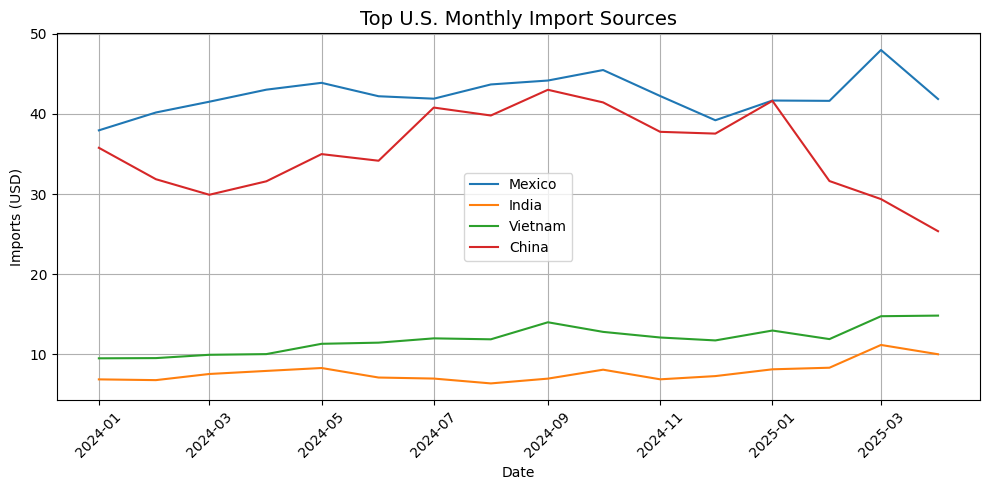

In [26]:
df_imp_sum = df_monthly_tp[df_monthly_tp['CTYNAME'].isin(['China','Mexico','Vietnam','India'])][['CTYNAME', 'Date', 'Imports','Exports']].copy()
df_imp_sum = df_imp_sum[df_imp_sum['Date']>='2017-01-01']
plt.figure(figsize=(10,5))

sns.lineplot(data=df_imp_sum, x='Date', y='Imports', hue='CTYNAME', marker='',)
plt.title('Top U.S. Monthly Import Sources', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Imports (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='center')
plt.tight_layout()
plt.show()

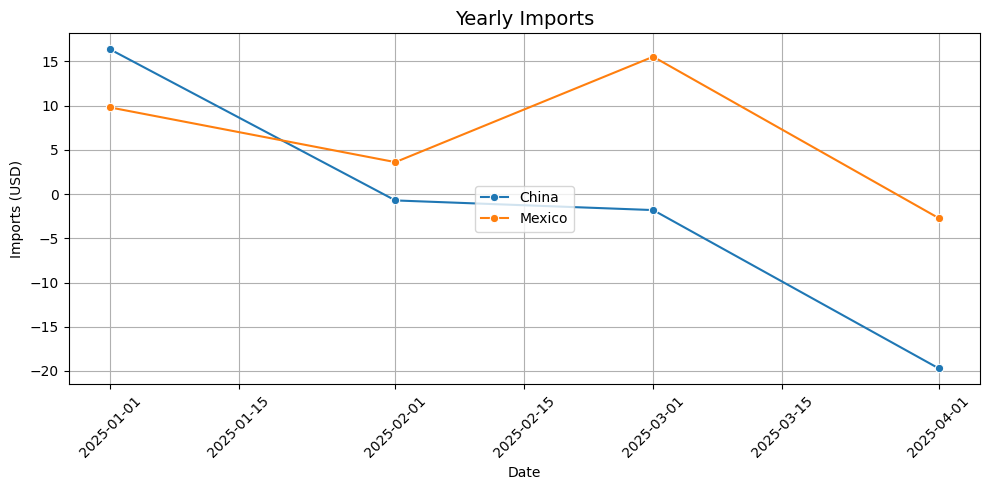

In [27]:
df_imp_sum['Date'] = pd.to_datetime(df_imp_sum['Date'])
df_imp_sum['Year'] = df_imp_sum['Date'].dt.year
df_imp_sum['Month'] = df_imp_sum['Date'].dt.month
df_imp_sum = df_imp_sum.sort_values(['CTYNAME', 'Month', 'Year'])
df_imp_sum['Prev_Year_Imports'] = df_imp_sum.groupby(['CTYNAME', 'Month'])['Imports'].shift(1)
df_imp_sum['YoY_Change_Imports'] = (
    (df_imp_sum['Imports'] - df_imp_sum['Prev_Year_Imports']) / df_imp_sum['Prev_Year_Imports'] * 100
).round(2)
#Compare U.S. imports by country: China vs Mexixo
df_imp_sum = df_imp_sum[df_imp_sum['CTYNAME'].isin(['China','Mexico'])]
df_imp_sum = df_imp_sum.reset_index(drop=True, inplace=False)
plt.figure(figsize=(10,5))
sns.lineplot(data=df_imp_sum, x='Date', y='YoY_Change_Imports', hue='CTYNAME', marker='o',)
plt.title('Yearly Imports', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Imports (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='center')
plt.tight_layout()
plt.show()

In [28]:
#China - Monthly Trade Data Analysis
df_tp = df[df['year'].isin([2022,2023,2024,2025])]
df_tp_china =df_tp[df_tp['CTYNAME']=='China']

#Calculate monthly trade balance
import_cols = ['IJAN', 'IFEB', 'IMAR', 'IAPR', 'IMAY', 'IJUN', 'IJUL', 'IAUG', 'ISEP', 'IOCT', 'INOV', 'IDEC']
export_cols = ['EJAN', 'EFEB', 'EMAR', 'EAPR', 'EMAY', 'EJUN', 'EJUL', 'EAUG', 'ESEP', 'EOCT', 'ENOV', 'EDEC']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a DataFrame for monthly trade balance
df_tp_china_monthly = []
for year in df_tp_china['year'].unique():
    for i, (imp_col, exp_col, month) in enumerate(zip(import_cols, export_cols, month_names)):
        monthly_trade = df_tp_china[df_tp_china['year'] == year][exp_col] - df_tp_china[df_tp_china['year'] == year][imp_col]
        monthly_df = pd.DataFrame({
            'CTYNAME': df_tp_china[df_tp_china['year'] == year]['CTYNAME'],
            'Date': pd.to_datetime(year.astype(str) + '-' + month, format='%Y-%b'),
            'Exports': df_tp_china[df_tp_china['year'] == year][exp_col],
            'Imports': df_tp_china[df_tp_china['year'] == year][imp_col],
            'Trade_Balance_Monthly': monthly_trade        
        })
        df_tp_china_monthly.append(monthly_df)

df_tp_china_monthly = pd.concat(df_tp_china_monthly, ignore_index=False)
#Remove 2025 future months
cutoff_date = '2025-04-01'
df_top_china_tb = df_tp_china_monthly[df_tp_china_monthly['Date']<=cutoff_date]

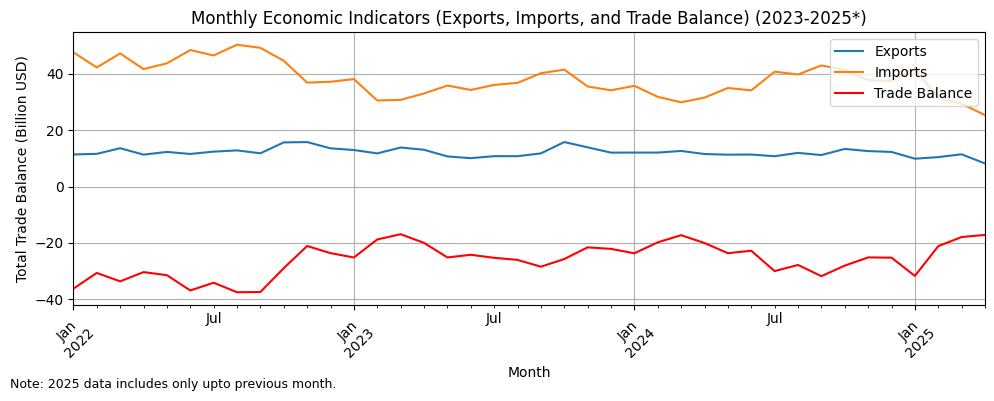

In [29]:
# Plot total trade balance by year (Line Plot)
df_monthly_china = df_top_china_tb[df_top_china_tb['CTYNAME']=='China'].groupby(['Date'])['Trade_Balance_Monthly'].sum() 
df_monthly_china_imports = df_top_china_tb[df_top_china_tb['CTYNAME']=='China'].groupby(['Date'])['Imports'].sum() 
df_monthly_china_exports = df_top_china_tb[df_top_china_tb['CTYNAME']=='China'].groupby(['Date'])['Exports'].sum()

fig = plt.figure(figsize=parameters['figsize'])

df_monthly_china_exports.plot( marker='',label='Exports')
df_monthly_china_imports.plot( marker='',label='Imports')
df_monthly_china.plot( marker='',label='Trade Balance',color='red')

plt.title('Monthly Economic Indicators (Exports, Imports, and Trade Balance) (2023-2025*)')
plt.xlabel('Month')
plt.ylabel('Total Trade Balance (Billion USD)')
plt.grid(True)
plt.legend()  # Add legend to distinguish lines loc='upper left'
plt.xticks(rotation=45)
plt.tight_layout()
# Add a footnote
fig.text(0.01, 0.01, 'Note: 2025 data includes only upto previous month.', 
         fontsize=9, ha='left', va='bottom', transform=fig.transFigure)

plt.show()

In [32]:
import os
current_path = os.getcwd()

In [33]:
current_path

'C:\\Users\\srini'